In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [11]:

a = torch.randint(0,10, (2,3,4))
k,p,q = list(map(int, a.shape))
k,p,q = map(int, a.shape)
print(k, p, q)
# print(k, p, q)

2 3 4


In [29]:
def load_tensor(file):

    with open(file, "rb") as f:
        binary_data = f.read()

    magic_number, ndims, dtype = np.frombuffer(binary_data, np.uint32, count=3, offset=0)
    assert magic_number == 0xFCCFE2E2, f"{file} not a tensor file."

    dims = np.frombuffer(binary_data, np.uint32, count=ndims, offset=3 * 4)

    if dtype == 0:
        np_dtype = np.float32
    elif dtype == 1:
        np_dtype = np.float16
    else:
        assert False, f"Unsupport dtype = {dtype}, can not convert to numpy dtype"

    return np.frombuffer(binary_data, np_dtype, offset=(ndims + 3) * 4).reshape(*dims)

(2048, 2048)


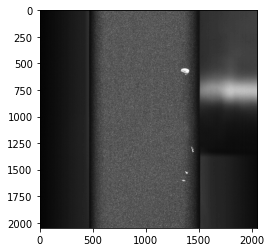

In [33]:
file = r"/media/ps/data/train/LQ/LQ/bdms/bdmask/workspace/imgs/process/2048"
img = load_tensor(file)
im = img[0][0]
plt.imshow(im,cmap="gray")
outpath = r'/media/ps/data/train/LQ/LQ/bdms/bdmask/workspace/imgs/process/2048.jpg'
plt.imsave(outpath, im, cmap="gray")

print(im.shape)


In [1]:
2048*2048
(3648, 5472)
(3648, 5472)

4194304

In [26]:
def mul(h, w):
    list = [8, 16, 32, 64, 128]
    sum = 0
    for i in list:
        sum += (int(h / i+0.5) * int(w / i+0.5))
    return sum
# mul(2048, 2048)
mul(3648, 5472)

415523

In [ ]:
2048/8 * 2048 /8 + 2048/16 * 2048 /16 + 2048/32 * 2048 /32

In [24]:
int(3648 / 64+0.5) * int(5472/64+0.5)

4902

In [25]:
int(3648 / 16+0.5) * int(5472/16+0.5)

77976

In [22]:
int(3648 / 128+0.5) * int(5472/128+0.5)

1247

In [23]:
3648 / 128

28.5

In [27]:
311904+77976+19494+4902+1247

415523